In [63]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [64]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

In [65]:
housing = pd.read_csv("./data/Ames_Housing_Price_Data.csv", index_col=0)
realestate = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Extra Trees on all Features

# Cleaning Data 

### Getting Lat - LONG 

In [66]:
#making index a column 
realestate['MapRefNo'] = realestate.index

# creating a new dataframe with only necessary columns 
realestate1 = realestate[['MapRefNo', 'GeoRefNo', 'Prop_Addr', 'Neighborhood', 'ClassPr_S', 'SchD_S', 'TxD_S']]

#renamed realestate MapRefNo to PID to Merge on PID 
realestate1.rename(columns = {'MapRefNo':'PID'}, inplace = True) 

#Merging Dataframes on PID
clean_df = pd.merge(housing, realestate1, on = 'PID', how='left')


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
#dropping duplicates 
clean_df = clean_df.drop_duplicates(subset = ['PID'])
clean_df.shape #checking shape

(2579, 87)

In [68]:
# Function to get Latitude and Longitude

from geopy.geocoders import Nominatim
# location = geolocator.geocode("2400 SE 16TH ST AMES, IA")

def get_lat_log(address):
    geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36")
    geocode = lambda query: geolocator.geocode("%s, AMES IA" % query)
    location = geocode(address)
    
    if location == None:
        return None 
    
    return (location.latitude, location.longitude)

In [69]:
# Function to get distance from schools
from geopy.distance import geodesic

def get_school_dist(lat_log, school_lat_log):
    """ Get School Distance
    :lat_log - tuple, address lat and log
    :school_lst_log -tuple, school lat and log
    Return: distance between both addresses
    """
    return(geodesic(lat_log, school_lat_log).miles)

In [70]:
from time import sleep


addresses = clean_df["Prop_Addr"]

total_addresses = len(addresses)
count = 0
none_count_hs = 0
none_count_c = 0

high_school = "Ames High School 1921 Ames High Drive Ames, IA 50010"
hs_lat_log = get_lat_log(high_school)

college = "100 Enrollment Services Ctr"
c_lat_log = get_lat_log(college)

address_lat_log = []
highschool_dist = []
college_dist = []

for address in addresses:
    sleep(.25)
    lat_log = get_lat_log(address)
    address_lat_log.append(lat_log)
    
    dist_hs = get_school_dist(lat_log, hs_lat_log)
    if dist_hs is None:
        dist_hs = 0
        non_count_hs += 1
    highschool_dist.append(dist_hs) 
    
    sleep(.25)
    dist_c = get_school_dist(lat_log, c_lat_log)
    if dist_c is None:
        dist_c = 0
        non_count_c += 1
    college_dist.append(dist_c)
    
    
    count += 1
    print(f"On address {count} out of {total_addresses}")
    print(f"Got None: High School: {none_count_hs} college: {none_count_c}")

print("Done!")


On address 1 out of 2579
Got None: High School: 0 college: 0
On address 2 out of 2579
Got None: High School: 0 college: 0
On address 3 out of 2579
Got None: High School: 0 college: 0
On address 4 out of 2579
Got None: High School: 0 college: 0
On address 5 out of 2579
Got None: High School: 0 college: 0
On address 6 out of 2579
Got None: High School: 0 college: 0
On address 7 out of 2579
Got None: High School: 0 college: 0
On address 8 out of 2579
Got None: High School: 0 college: 0
On address 9 out of 2579
Got None: High School: 0 college: 0
On address 10 out of 2579
Got None: High School: 0 college: 0
On address 11 out of 2579
Got None: High School: 0 college: 0
On address 12 out of 2579
Got None: High School: 0 college: 0
On address 13 out of 2579
Got None: High School: 0 college: 0
On address 14 out of 2579
Got None: High School: 0 college: 0
On address 15 out of 2579
Got None: High School: 0 college: 0
On address 16 out of 2579
Got None: High School: 0 college: 0
On address 17 out

On address 133 out of 2579
Got None: High School: 0 college: 0
On address 134 out of 2579
Got None: High School: 0 college: 0
On address 135 out of 2579
Got None: High School: 0 college: 0
On address 136 out of 2579
Got None: High School: 0 college: 0
On address 137 out of 2579
Got None: High School: 0 college: 0
On address 138 out of 2579
Got None: High School: 0 college: 0
On address 139 out of 2579
Got None: High School: 0 college: 0
On address 140 out of 2579
Got None: High School: 0 college: 0
On address 141 out of 2579
Got None: High School: 0 college: 0
On address 142 out of 2579
Got None: High School: 0 college: 0
On address 143 out of 2579
Got None: High School: 0 college: 0
On address 144 out of 2579
Got None: High School: 0 college: 0
On address 145 out of 2579
Got None: High School: 0 college: 0
On address 146 out of 2579
Got None: High School: 0 college: 0
On address 147 out of 2579
Got None: High School: 0 college: 0
On address 148 out of 2579
Got None: High School: 0 col

On address 264 out of 2579
Got None: High School: 0 college: 0
On address 265 out of 2579
Got None: High School: 0 college: 0
On address 266 out of 2579
Got None: High School: 0 college: 0
On address 267 out of 2579
Got None: High School: 0 college: 0
On address 268 out of 2579
Got None: High School: 0 college: 0
On address 269 out of 2579
Got None: High School: 0 college: 0
On address 270 out of 2579
Got None: High School: 0 college: 0
On address 271 out of 2579
Got None: High School: 0 college: 0
On address 272 out of 2579
Got None: High School: 0 college: 0
On address 273 out of 2579
Got None: High School: 0 college: 0
On address 274 out of 2579
Got None: High School: 0 college: 0
On address 275 out of 2579
Got None: High School: 0 college: 0
On address 276 out of 2579
Got None: High School: 0 college: 0
On address 277 out of 2579
Got None: High School: 0 college: 0
On address 278 out of 2579
Got None: High School: 0 college: 0
On address 279 out of 2579
Got None: High School: 0 col

On address 395 out of 2579
Got None: High School: 0 college: 0
On address 396 out of 2579
Got None: High School: 0 college: 0
On address 397 out of 2579
Got None: High School: 0 college: 0
On address 398 out of 2579
Got None: High School: 0 college: 0
On address 399 out of 2579
Got None: High School: 0 college: 0
On address 400 out of 2579
Got None: High School: 0 college: 0
On address 401 out of 2579
Got None: High School: 0 college: 0
On address 402 out of 2579
Got None: High School: 0 college: 0
On address 403 out of 2579
Got None: High School: 0 college: 0
On address 404 out of 2579
Got None: High School: 0 college: 0
On address 405 out of 2579
Got None: High School: 0 college: 0
On address 406 out of 2579
Got None: High School: 0 college: 0
On address 407 out of 2579
Got None: High School: 0 college: 0
On address 408 out of 2579
Got None: High School: 0 college: 0
On address 409 out of 2579
Got None: High School: 0 college: 0
On address 410 out of 2579
Got None: High School: 0 col

On address 526 out of 2579
Got None: High School: 0 college: 0
On address 527 out of 2579
Got None: High School: 0 college: 0
On address 528 out of 2579
Got None: High School: 0 college: 0
On address 529 out of 2579
Got None: High School: 0 college: 0
On address 530 out of 2579
Got None: High School: 0 college: 0
On address 531 out of 2579
Got None: High School: 0 college: 0
On address 532 out of 2579
Got None: High School: 0 college: 0
On address 533 out of 2579
Got None: High School: 0 college: 0
On address 534 out of 2579
Got None: High School: 0 college: 0
On address 535 out of 2579
Got None: High School: 0 college: 0
On address 536 out of 2579
Got None: High School: 0 college: 0
On address 537 out of 2579
Got None: High School: 0 college: 0
On address 538 out of 2579
Got None: High School: 0 college: 0
On address 539 out of 2579
Got None: High School: 0 college: 0
On address 540 out of 2579
Got None: High School: 0 college: 0
On address 541 out of 2579
Got None: High School: 0 col

On address 657 out of 2579
Got None: High School: 0 college: 0
On address 658 out of 2579
Got None: High School: 0 college: 0
On address 659 out of 2579
Got None: High School: 0 college: 0
On address 660 out of 2579
Got None: High School: 0 college: 0
On address 661 out of 2579
Got None: High School: 0 college: 0
On address 662 out of 2579
Got None: High School: 0 college: 0
On address 663 out of 2579
Got None: High School: 0 college: 0
On address 664 out of 2579
Got None: High School: 0 college: 0
On address 665 out of 2579
Got None: High School: 0 college: 0
On address 666 out of 2579
Got None: High School: 0 college: 0
On address 667 out of 2579
Got None: High School: 0 college: 0
On address 668 out of 2579
Got None: High School: 0 college: 0
On address 669 out of 2579
Got None: High School: 0 college: 0
On address 670 out of 2579
Got None: High School: 0 college: 0
On address 671 out of 2579
Got None: High School: 0 college: 0
On address 672 out of 2579
Got None: High School: 0 col

On address 788 out of 2579
Got None: High School: 0 college: 0
On address 789 out of 2579
Got None: High School: 0 college: 0
On address 790 out of 2579
Got None: High School: 0 college: 0
On address 791 out of 2579
Got None: High School: 0 college: 0
On address 792 out of 2579
Got None: High School: 0 college: 0
On address 793 out of 2579
Got None: High School: 0 college: 0
On address 794 out of 2579
Got None: High School: 0 college: 0
On address 795 out of 2579
Got None: High School: 0 college: 0
On address 796 out of 2579
Got None: High School: 0 college: 0
On address 797 out of 2579
Got None: High School: 0 college: 0
On address 798 out of 2579
Got None: High School: 0 college: 0
On address 799 out of 2579
Got None: High School: 0 college: 0
On address 800 out of 2579
Got None: High School: 0 college: 0
On address 801 out of 2579
Got None: High School: 0 college: 0
On address 802 out of 2579
Got None: High School: 0 college: 0
On address 803 out of 2579
Got None: High School: 0 col

On address 919 out of 2579
Got None: High School: 0 college: 0
On address 920 out of 2579
Got None: High School: 0 college: 0
On address 921 out of 2579
Got None: High School: 0 college: 0
On address 922 out of 2579
Got None: High School: 0 college: 0
On address 923 out of 2579
Got None: High School: 0 college: 0
On address 924 out of 2579
Got None: High School: 0 college: 0
On address 925 out of 2579
Got None: High School: 0 college: 0
On address 926 out of 2579
Got None: High School: 0 college: 0
On address 927 out of 2579
Got None: High School: 0 college: 0
On address 928 out of 2579
Got None: High School: 0 college: 0
On address 929 out of 2579
Got None: High School: 0 college: 0
On address 930 out of 2579
Got None: High School: 0 college: 0
On address 931 out of 2579
Got None: High School: 0 college: 0
On address 932 out of 2579
Got None: High School: 0 college: 0
On address 933 out of 2579
Got None: High School: 0 college: 0
On address 934 out of 2579
Got None: High School: 0 col

On address 1049 out of 2579
Got None: High School: 0 college: 0
On address 1050 out of 2579
Got None: High School: 0 college: 0
On address 1051 out of 2579
Got None: High School: 0 college: 0
On address 1052 out of 2579
Got None: High School: 0 college: 0
On address 1053 out of 2579
Got None: High School: 0 college: 0
On address 1054 out of 2579
Got None: High School: 0 college: 0
On address 1055 out of 2579
Got None: High School: 0 college: 0
On address 1056 out of 2579
Got None: High School: 0 college: 0
On address 1057 out of 2579
Got None: High School: 0 college: 0
On address 1058 out of 2579
Got None: High School: 0 college: 0
On address 1059 out of 2579
Got None: High School: 0 college: 0
On address 1060 out of 2579
Got None: High School: 0 college: 0
On address 1061 out of 2579
Got None: High School: 0 college: 0
On address 1062 out of 2579
Got None: High School: 0 college: 0
On address 1063 out of 2579
Got None: High School: 0 college: 0
On address 1064 out of 2579
Got None: Hi

On address 1178 out of 2579
Got None: High School: 0 college: 0
On address 1179 out of 2579
Got None: High School: 0 college: 0
On address 1180 out of 2579
Got None: High School: 0 college: 0
On address 1181 out of 2579
Got None: High School: 0 college: 0
On address 1182 out of 2579
Got None: High School: 0 college: 0
On address 1183 out of 2579
Got None: High School: 0 college: 0
On address 1184 out of 2579
Got None: High School: 0 college: 0
On address 1185 out of 2579
Got None: High School: 0 college: 0
On address 1186 out of 2579
Got None: High School: 0 college: 0
On address 1187 out of 2579
Got None: High School: 0 college: 0
On address 1188 out of 2579
Got None: High School: 0 college: 0
On address 1189 out of 2579
Got None: High School: 0 college: 0
On address 1190 out of 2579
Got None: High School: 0 college: 0
On address 1191 out of 2579
Got None: High School: 0 college: 0
On address 1192 out of 2579
Got None: High School: 0 college: 0
On address 1193 out of 2579
Got None: Hi

On address 1307 out of 2579
Got None: High School: 0 college: 0
On address 1308 out of 2579
Got None: High School: 0 college: 0
On address 1309 out of 2579
Got None: High School: 0 college: 0
On address 1310 out of 2579
Got None: High School: 0 college: 0
On address 1311 out of 2579
Got None: High School: 0 college: 0
On address 1312 out of 2579
Got None: High School: 0 college: 0
On address 1313 out of 2579
Got None: High School: 0 college: 0
On address 1314 out of 2579
Got None: High School: 0 college: 0
On address 1315 out of 2579
Got None: High School: 0 college: 0
On address 1316 out of 2579
Got None: High School: 0 college: 0
On address 1317 out of 2579
Got None: High School: 0 college: 0
On address 1318 out of 2579
Got None: High School: 0 college: 0
On address 1319 out of 2579
Got None: High School: 0 college: 0
On address 1320 out of 2579
Got None: High School: 0 college: 0
On address 1321 out of 2579
Got None: High School: 0 college: 0
On address 1322 out of 2579
Got None: Hi

On address 1436 out of 2579
Got None: High School: 0 college: 0
On address 1437 out of 2579
Got None: High School: 0 college: 0
On address 1438 out of 2579
Got None: High School: 0 college: 0
On address 1439 out of 2579
Got None: High School: 0 college: 0
On address 1440 out of 2579
Got None: High School: 0 college: 0
On address 1441 out of 2579
Got None: High School: 0 college: 0
On address 1442 out of 2579
Got None: High School: 0 college: 0
On address 1443 out of 2579
Got None: High School: 0 college: 0
On address 1444 out of 2579
Got None: High School: 0 college: 0
On address 1445 out of 2579
Got None: High School: 0 college: 0
On address 1446 out of 2579
Got None: High School: 0 college: 0
On address 1447 out of 2579
Got None: High School: 0 college: 0
On address 1448 out of 2579
Got None: High School: 0 college: 0
On address 1449 out of 2579
Got None: High School: 0 college: 0
On address 1450 out of 2579
Got None: High School: 0 college: 0
On address 1451 out of 2579
Got None: Hi

On address 1565 out of 2579
Got None: High School: 0 college: 0
On address 1566 out of 2579
Got None: High School: 0 college: 0
On address 1567 out of 2579
Got None: High School: 0 college: 0
On address 1568 out of 2579
Got None: High School: 0 college: 0
On address 1569 out of 2579
Got None: High School: 0 college: 0
On address 1570 out of 2579
Got None: High School: 0 college: 0
On address 1571 out of 2579
Got None: High School: 0 college: 0
On address 1572 out of 2579
Got None: High School: 0 college: 0
On address 1573 out of 2579
Got None: High School: 0 college: 0
On address 1574 out of 2579
Got None: High School: 0 college: 0
On address 1575 out of 2579
Got None: High School: 0 college: 0
On address 1576 out of 2579
Got None: High School: 0 college: 0
On address 1577 out of 2579
Got None: High School: 0 college: 0
On address 1578 out of 2579
Got None: High School: 0 college: 0
On address 1579 out of 2579
Got None: High School: 0 college: 0
On address 1580 out of 2579
Got None: Hi

On address 1694 out of 2579
Got None: High School: 0 college: 0
On address 1695 out of 2579
Got None: High School: 0 college: 0
On address 1696 out of 2579
Got None: High School: 0 college: 0
On address 1697 out of 2579
Got None: High School: 0 college: 0
On address 1698 out of 2579
Got None: High School: 0 college: 0
On address 1699 out of 2579
Got None: High School: 0 college: 0
On address 1700 out of 2579
Got None: High School: 0 college: 0
On address 1701 out of 2579
Got None: High School: 0 college: 0
On address 1702 out of 2579
Got None: High School: 0 college: 0
On address 1703 out of 2579
Got None: High School: 0 college: 0
On address 1704 out of 2579
Got None: High School: 0 college: 0
On address 1705 out of 2579
Got None: High School: 0 college: 0
On address 1706 out of 2579
Got None: High School: 0 college: 0
On address 1707 out of 2579
Got None: High School: 0 college: 0
On address 1708 out of 2579
Got None: High School: 0 college: 0
On address 1709 out of 2579
Got None: Hi

On address 1823 out of 2579
Got None: High School: 0 college: 0
On address 1824 out of 2579
Got None: High School: 0 college: 0
On address 1825 out of 2579
Got None: High School: 0 college: 0
On address 1826 out of 2579
Got None: High School: 0 college: 0
On address 1827 out of 2579
Got None: High School: 0 college: 0
On address 1828 out of 2579
Got None: High School: 0 college: 0
On address 1829 out of 2579
Got None: High School: 0 college: 0
On address 1830 out of 2579
Got None: High School: 0 college: 0
On address 1831 out of 2579
Got None: High School: 0 college: 0
On address 1832 out of 2579
Got None: High School: 0 college: 0
On address 1833 out of 2579
Got None: High School: 0 college: 0
On address 1834 out of 2579
Got None: High School: 0 college: 0
On address 1835 out of 2579
Got None: High School: 0 college: 0
On address 1836 out of 2579
Got None: High School: 0 college: 0
On address 1837 out of 2579
Got None: High School: 0 college: 0
On address 1838 out of 2579
Got None: Hi

On address 1952 out of 2579
Got None: High School: 0 college: 0
On address 1953 out of 2579
Got None: High School: 0 college: 0
On address 1954 out of 2579
Got None: High School: 0 college: 0
On address 1955 out of 2579
Got None: High School: 0 college: 0
On address 1956 out of 2579
Got None: High School: 0 college: 0
On address 1957 out of 2579
Got None: High School: 0 college: 0
On address 1958 out of 2579
Got None: High School: 0 college: 0
On address 1959 out of 2579
Got None: High School: 0 college: 0
On address 1960 out of 2579
Got None: High School: 0 college: 0
On address 1961 out of 2579
Got None: High School: 0 college: 0
On address 1962 out of 2579
Got None: High School: 0 college: 0
On address 1963 out of 2579
Got None: High School: 0 college: 0
On address 1964 out of 2579
Got None: High School: 0 college: 0
On address 1965 out of 2579
Got None: High School: 0 college: 0
On address 1966 out of 2579
Got None: High School: 0 college: 0
On address 1967 out of 2579
Got None: Hi

On address 2081 out of 2579
Got None: High School: 0 college: 0
On address 2082 out of 2579
Got None: High School: 0 college: 0
On address 2083 out of 2579
Got None: High School: 0 college: 0
On address 2084 out of 2579
Got None: High School: 0 college: 0
On address 2085 out of 2579
Got None: High School: 0 college: 0
On address 2086 out of 2579
Got None: High School: 0 college: 0
On address 2087 out of 2579
Got None: High School: 0 college: 0
On address 2088 out of 2579
Got None: High School: 0 college: 0
On address 2089 out of 2579
Got None: High School: 0 college: 0
On address 2090 out of 2579
Got None: High School: 0 college: 0
On address 2091 out of 2579
Got None: High School: 0 college: 0
On address 2092 out of 2579
Got None: High School: 0 college: 0
On address 2093 out of 2579
Got None: High School: 0 college: 0
On address 2094 out of 2579
Got None: High School: 0 college: 0
On address 2095 out of 2579
Got None: High School: 0 college: 0
On address 2096 out of 2579
Got None: Hi

On address 2210 out of 2579
Got None: High School: 0 college: 0
On address 2211 out of 2579
Got None: High School: 0 college: 0
On address 2212 out of 2579
Got None: High School: 0 college: 0
On address 2213 out of 2579
Got None: High School: 0 college: 0
On address 2214 out of 2579
Got None: High School: 0 college: 0
On address 2215 out of 2579
Got None: High School: 0 college: 0
On address 2216 out of 2579
Got None: High School: 0 college: 0
On address 2217 out of 2579
Got None: High School: 0 college: 0
On address 2218 out of 2579
Got None: High School: 0 college: 0
On address 2219 out of 2579
Got None: High School: 0 college: 0
On address 2220 out of 2579
Got None: High School: 0 college: 0
On address 2221 out of 2579
Got None: High School: 0 college: 0
On address 2222 out of 2579
Got None: High School: 0 college: 0
On address 2223 out of 2579
Got None: High School: 0 college: 0
On address 2224 out of 2579
Got None: High School: 0 college: 0
On address 2225 out of 2579
Got None: Hi

On address 2339 out of 2579
Got None: High School: 0 college: 0
On address 2340 out of 2579
Got None: High School: 0 college: 0
On address 2341 out of 2579
Got None: High School: 0 college: 0
On address 2342 out of 2579
Got None: High School: 0 college: 0
On address 2343 out of 2579
Got None: High School: 0 college: 0
On address 2344 out of 2579
Got None: High School: 0 college: 0
On address 2345 out of 2579
Got None: High School: 0 college: 0
On address 2346 out of 2579
Got None: High School: 0 college: 0
On address 2347 out of 2579
Got None: High School: 0 college: 0
On address 2348 out of 2579
Got None: High School: 0 college: 0
On address 2349 out of 2579
Got None: High School: 0 college: 0
On address 2350 out of 2579
Got None: High School: 0 college: 0
On address 2351 out of 2579
Got None: High School: 0 college: 0
On address 2352 out of 2579
Got None: High School: 0 college: 0
On address 2353 out of 2579
Got None: High School: 0 college: 0
On address 2354 out of 2579
Got None: Hi

On address 2468 out of 2579
Got None: High School: 0 college: 0
On address 2469 out of 2579
Got None: High School: 0 college: 0
On address 2470 out of 2579
Got None: High School: 0 college: 0
On address 2471 out of 2579
Got None: High School: 0 college: 0
On address 2472 out of 2579
Got None: High School: 0 college: 0
On address 2473 out of 2579
Got None: High School: 0 college: 0
On address 2474 out of 2579
Got None: High School: 0 college: 0
On address 2475 out of 2579
Got None: High School: 0 college: 0
On address 2476 out of 2579
Got None: High School: 0 college: 0
On address 2477 out of 2579
Got None: High School: 0 college: 0
On address 2478 out of 2579
Got None: High School: 0 college: 0
On address 2479 out of 2579
Got None: High School: 0 college: 0
On address 2480 out of 2579
Got None: High School: 0 college: 0
On address 2481 out of 2579
Got None: High School: 0 college: 0
On address 2482 out of 2579
Got None: High School: 0 college: 0
On address 2483 out of 2579
Got None: Hi

In [71]:
clean_df.shape

(2579, 87)

In [83]:
#looking at zoning - Will only keep residential
clean_df.MSZoning.value_counts()

RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [84]:
#drop non residential properties 
clean_df = clean_df[clean_df.MSZoning != 'C (all)']
clean_df = clean_df[clean_df.MSZoning != 'I (all)']
clean_df = clean_df[clean_df.MSZoning != 'A (agr)']

In [85]:
#check 
clean_df.MSZoning.value_counts()

RL    2007
RM     418
FV     113
RH      21
Name: MSZoning, dtype: int64

In [86]:
# check to see what it looks like after dropping CIA 
clean_df['Functional'].value_counts()

Typ     2383
Min2      64
Min1      56
Mod       31
Maj1      17
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [87]:
#removing outliers from GrLivArea & LotArea & TotalBsmtSF
clean_df = clean_df.loc[(clean_df['GrLivArea']<4000) & (clean_df['LotArea']<100000)\
                        & (clean_df['TotalBsmtSF']<3000),:]


In [137]:
clean_df = clean_df.replace(np.nan, 0)

clean_df = clean_df.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

#### Getting Curb Appeal Column

In [131]:
clean_df['MasVnrArea'].replace(to_replace=0, value=np.nan, inplace=True)
clean_df['MasVnrArea_bin'] = pd.qcut(clean_df['MasVnrArea'], q=5)
clean_df['MasVnrArea_vals'] = pd.cut(x=clean_df['MasVnrArea'],\
                                 bins=[0.999, 104.0, 169.4, 242.0, 363.6,\
                                       1600], labels=[1,2,3,4,5])

clean_df['LotFrontage'].replace(to_replace=0, value=np.nan, inplace=True)
clean_df['LotFrontage_bin'] = pd.qcut(clean_df['LotFrontage'], q=5)
clean_df['LotFrontage_vals'] = pd.cut(x=clean_df['LotFrontage'],\
                                 bins=[20.999, 52.0, 62.0, 72.0, 82.0,\
                                       313.0], labels=[1,2,3,4,5])

clean_df = clean_df.replace(np.nan, 0)

clean_df = clean_df.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

clean_df['Street'] = clean_df['Street'].replace({"Grvl":2, "Pave":4})

clean_df['LotShape'] = clean_df['LotShape'].replace({"Reg":1.5, "IR1":3, "IR3":3, "IR2":4.5})

clean_df['LandContour'] = clean_df['LandContour'].replace({"Bnk":1.25, "Lvl":2.5, "Low":3.75, "HLS":5})

clean_df['LotConfig'] = clean_df['LotConfig'].replace({"FR2":1, "Inside":2, "Corner":3, "FR3":4, "CulDSac":5})

clean_df['LandSlope'] = clean_df['LandSlope'].replace({"Gtl":1.5, "Mod":3, "Sev":5})

clean_df['RoofStyle'] = clean_df['RoofStyle'].replace({"Gambrel":1, "Gable":2, "Mansard":3, "Flat":4,"Hip":5, "Shed":5})

clean_df['RoofMatl'] = clean_df['RoofMatl'].replace({"Roll":1, "CompShg":2, "Metal":2, "Tar&Grv":2.5,\
  "WdShake":3, "Membran":4, "WdShngl":5})

clean_df['Exterior1st'] = clean_df['Exterior1st'].replace({"AsphShn":1, "CBlock":1, "AsbShng":2, "Wd Sdng":2.5,\
  "WdShing":2.5, "Stucco":2.5, "MetalSd":3, "BrkComm":3, "HdBoard":3.5,\
  "Plywood":4, "BrkFace":4, "CemntBd":4.5, "VinylSd":4.5, "PreCast":5,\
  "ImStucc":5})

KeyError: 'MasVnrArea'

In [12]:
clean_df['curb_appeal']= (clean_df['MasVnrArea_vals'] + clean_df['LotFrontage_vals']\
+ clean_df['Street'] + clean_df['LotShape'] + clean_df['LandContour'] + clean_df['LotConfig']\
+ clean_df['LandSlope'] + clean_df['RoofStyle'] + clean_df['RoofMatl'] + clean_df['Exterior1st']\
+ clean_df['ExterQual'] + clean_df['ExterCond'])/12

TypeError: unsupported operand type(s) for +: 'Categorical' and 'Categorical'

In [10]:
#clean_df['MSZoning'] == "FV", "RH", "RL", "RP", "RM"

# Keeping columns

In [88]:
# 0 'SalePriceLog' ADDing New Column 
clean_df['SalePriceLog'] = np.log10(clean_df['SalePrice'])
clean_df['SalePriceLog'] = clean_df['SalePriceLog'].astype(np.int64)

In [89]:
# 5 Curb Appeal 

In [90]:
# 6 utilities
clean_df.Utilities = clean_df.Utilities.replace({'AllPub':1,'NoSewr':0})

In [151]:
clean_df.Neighborhood_y.value_counts()

10    408
17    236
5     206
6     162
22    143
13    143
8     139
14    123
25    119
12    112
11    103
4     102
18     92
27     65
3      58
23     50
7      41
19     37
1      34
2      29
0      28
16     23
24     23
21     23
9      22
28     20
15      8
Name: Neighborhood_y, dtype: int64

In [91]:
# 7 Neighborhood - replace with real estate neighborhood
clean_df.Neighborhood_y = clean_df.Neighborhood_y.replace({'MeadowV':1,"Br'Dale":2, 'IDOT&RR':3, 'BrkSide':4, 'OldTown':5, 'Edwards':6, 'S&W ISU':7, 'Sawyer':8, 'NoPkVil':9,\
                           'N Ames':10, 'Mitchel':11, 'SawyerW':12, 'Gilbert':13, 'NW Ames':14, 'Greens':15, 'Blmngtn':16, 'CollgCr':17, 'Crawfor':18,\
                           'ClearCr':19, 'Somerst':20, 'Stonebr':21, 'Somerst':22, 'Timber':23, 'Veenker':24, 'NRidgHt':25, 'StoneBr':26,'NoRidge':27, 'HaydnLk':28})



In [150]:
# 7 Neighborhood - replace with real estate neighborhood
clean_df.Neighborhood_y = clean_df.Neighborhood_y.replace({'Bluestm':0})



In [92]:
# 8 Condition1 - Proximity to various conditions
clean_df.Condition1 = clean_df.Condition1.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})

# 9 Condition2 - Proximity to various conditions (if more than one is present)
clean_df.Condition2 = clean_df.Condition2.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})


In [93]:
# 10 BldgType
clean_df.BldgType = clean_df.BldgType.replace({'2fmCon':1,'Twnhs':2, 'Duplex':3, '1Fam':4, 'TwnhsE':5})



In [94]:
# 11 HouseStyle - CHANGE to binary 0 =ranch, 1 = colonial 
clean_df.HouseStyle = clean_df.HouseStyle.replace({'1.5Unf':0,'1.5Fin':0, 'SFoyer':1, 'SLvl':1, '1Story':0, '2.5Unf':1, '2Story':1, '2.5Fin':1})


In [95]:
# 20 BsmtSF_Fin 
clean_df["BsmtSF_Fin"] =  clean_df['BsmtFinSF1'] + clean_df['BsmtFinSF2']

In [138]:
# 22 CentralAir - changed to binary 

clean_df.CentralAir = clean_df.CentralAir.replace({"Y": 1, "N": 0})


In [97]:
# 23 Electrical - to dumify 
clean_df['Electrical'] = pd.get_dummies(clean_df['Electrical'])

In [98]:
#25 Bathroom
clean_df['HalfBath2'] = clean_df['HalfBath'].fillna(0.0)*0.5
clean_df['BsmtFullBath2'] = clean_df['BsmtFullBath'].fillna(0.0)*.6 
clean_df['BsmtHalfBath2'] = clean_df['BsmtHalfBath'].fillna(0.0)*.2

clean_df['bathroom'] = clean_df['FullBath'] + clean_df['HalfBath2'] + clean_df['BsmtFullBath2'] + clean_df['BsmtHalfBath2']


In [99]:
# 30 GarageType

clean_df["GarageType"] = clean_df.GarageType.apply(lambda x: 0 if x == 'Attchd' else(1))


In [143]:
# 31 Garage Finish
clean_df.GarageFinish.fillna(0, inplace=True)
clean_df.GarageFinish = clean_df.GarageFinish.replace({'Unf':0,'RFn':1, 'Fin':1})


In [101]:
#34 PorchTotSF
clean_df['GrPorchArea']=clean_df['OpenPorchSF']+clean_df['EnclosedPorch']+clean_df['3SsnPorch'] + clean_df['ScreenPorch']



In [102]:
# 35 HasPorch
clean_df['HasPorch']=clean_df.GrPorchArea.apply(lambda x: 1 if x>0 else(0))


In [103]:
# 36 HasDeck 
clean_df['HasDeck']=clean_df.WoodDeckSF.apply(lambda x: 1 if x>0 else(0))


In [104]:
# 37 HasPool
clean_df['Pool_YN']=clean_df.PoolArea.apply(lambda x: 1 if x>0 else(0))


In [105]:
# 38 Fence 
clean_df.Fence.fillna(0, inplace=True)
clean_df.Fence = clean_df.Fence.replace({'MnWw':1,'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [106]:
# 39 MoSold



In [107]:
# 40 HasGarage 
clean_df['GarageCars'] = clean_df.GarageCars.apply(lambda x: 1 if x>0 else(0))



In [108]:
# 41 HasFinBsmt
clean_df['BsmtSF_Fin'] = clean_df.BsmtSF_Fin.apply(lambda x: 1 if x>0 else(0))



In [109]:
# 42 BeenRemod
clean_df['BeenRemod'] = np.where(clean_df.YearRemodAdd != clean_df.YearBuilt, 1, 0)



In [110]:
# 43 shed
clean_df['Shed'] = clean_df.MiscFeature=='Shed'
clean_df.Shed = clean_df.Shed.astype(int)

# 44 Gar2
clean_df['Gar2'] = clean_df.MiscFeature=='Gar2'
clean_df.Gar2 = clean_df.Gar2.astype(int)

clean_df.drop(columns='MiscFeature', inplace=True)

In [118]:
# 45 Log-Lat
#clean_df["address_lat_log"] = address_lat_log

In [114]:
# 46 Distance to Highschool
clean_df['highschool_dist'] = highschool_dist


In [79]:
# 47 Distance to College
clean_df['college_dist'] = college_dist

In [81]:
# 48 Latitude

# 49 Longitude

# separate tuple to two columns
clean_df[['latitude', 'longitude']] = pd.DataFrame(clean_df["address_lat_log"].tolist(), index = clean_df.index)


In [144]:
clean_df.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,Utilities,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,Fence,MoSold,Neighborhood_y,highschool_dist,college_dist,latitude,longitude,SalePriceLog,BsmtSF_Fin,HalfBath2,BsmtFullBath2,BsmtHalfBath2,bathroom,GrPorchArea,HasPorch,HasDeck,Pool_YN,BeenRemod,Shed,Gar2
0,856,126000,0.0,7890,1,1,1,4,0,6,6,1939,3,3,3.0,3.0,856.0,3,1,0,2,1,4.0,1,0,1,3.0,0,3,7,1.748507,0.467930,42.018564,-93.651619,5,1,0.0,0.6,0.0,1.6,166,1,0,0,1,0,0
1,1049,139500,42.0,4235,1,1,1,5,0,5,5,1984,4,3,4.0,3.0,1049.0,3,1,0,2,0,0.0,0,1,1,3.0,0,2,6,1.852690,0.749722,42.024855,-93.663671,5,1,0.0,0.6,0.0,2.6,105,1,0,0,0,0,0
4,1039,114000,80.0,8146,1,1,1,4,1,4,8,1900,4,4,2.0,3.0,405.0,4,1,0,2,0,0.0,1,0,1,3.0,0,5,5,1.152991,2.080107,42.037391,-93.612207,5,0,0.0,0.0,0.0,1.0,279,1,0,0,1,0,0
5,1665,227000,70.0,8400,1,1,1,4,1,8,6,2001,4,3,4.0,3.0,810.0,5,1,0,3,0,0.0,0,1,1,3.0,0,11,14,0.316567,1.611707,42.044554,-93.631818,5,1,0.5,0.6,0.0,3.1,45,1,0,0,0,0,0
6,1922,198500,64.0,7301,1,1,1,4,1,7,5,2003,4,3,0.0,0.0,0.0,5,1,0,4,1,5.0,1,1,1,3.0,0,7,6,2.477665,1.298492,42.019009,-93.672987,5,0,0.0,0.0,0.0,3.0,177,1,0,0,0,0,0


# Dropped columns

In [69]:
# Replace with Curl Appeal

#clean_df.Alley = clean_df.Alley.replace({'Grvl':1,'Pave':2,'None':3})


In [121]:
#clean_df.drop(columns='GarageYrBlt', inplace=True)

# # 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'
# clean_df.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

# #drop Bathroom ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
# clean_df.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'],inplace=True)

# #drop Basement columns ['BsmtFinSF1', 'BsmtFinSF2']
# clean_df.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2'],inplace=True)

# # PoolArea
# clean_df.drop(columns='PoolArea',inplace=True)

#dropping extra columns
clean_df.drop(columns=["MSSubClass", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "RoofStyle", "RoofMatl", \
"Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "YearRemodAdd", "Foundation", "BsmtExposure", "BsmtFinType1", \
"BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "Heating", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "BsmtFullBath", \
"BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "GarageYrBlt", "GarageCond", \
"PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "PoolQC", \
"MiscVal", "SaleType", "SaleCondition", "YrSold", 'PID','MSZoning', 'Neighborhood_x', 'GarageArea', 'ClassPr_S', 'SchD_S', 'TxD_S',\
'address_lat_log'],inplace=True)


KeyError: "['MSSubClass' 'Street' 'Alley' 'LotShape' 'LandContour' 'LotConfig'\n 'LandSlope' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'\n 'MasVnrType' 'MasVnrArea' 'YearRemodAdd' 'Foundation' 'BsmtExposure'\n 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'\n 'Heating' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'BsmtFullBath'\n 'BsmtHalfBath' 'FullBath' 'HalfBath' 'KitchenAbvGr' 'KitchenQual'\n 'TotRmsAbvGrd' 'GarageYrBlt' 'GarageCond' 'PavedDrive' 'WoodDeckSF'\n 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'\n 'PoolQC' 'MiscVal' 'SaleType' 'SaleCondition' 'YrSold'] not found in axis"

In [123]:
clean_df.drop(columns=['PID','MSZoning', 'Neighborhood_x', 'GarageArea', 'ClassPr_S', 'SchD_S', 'TxD_S',\
'address_lat_log'],inplace=True)

In [139]:
clean_df.drop(columns=['Prop_Addr', 'GeoRefNo', "Functional"],inplace=True)

In [140]:
clean_df.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'Utilities',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'Fence', 'MoSold',
       'Neighborhood_y', 'highschool_dist', 'college_dist', 'latitude',
       'longitude', 'SalePriceLog', 'BsmtSF_Fin', 'HalfBath2', 'BsmtFullBath2',
       'BsmtHalfBath2', 'bathroom', 'GrPorchArea', 'HasPorch', 'HasDeck',
       'Pool_YN', 'BeenRemod', 'Shed', 'Gar2'],
      dtype='object')

In [141]:
clean_df.shape

(2549, 47)

In [145]:
clean_df.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,Utilities,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,Fence,MoSold,Neighborhood_y,highschool_dist,college_dist,latitude,longitude,SalePriceLog,BsmtSF_Fin,HalfBath2,BsmtFullBath2,BsmtHalfBath2,bathroom,GrPorchArea,HasPorch,HasDeck,Pool_YN,BeenRemod,Shed,Gar2
0,856,126000,0.0,7890,1,1,1,4,0,6,6,1939,3,3,3.0,3.0,856.0,3,1,0,2,1,4.0,1,0,1,3.0,0,3,7,1.748507,0.467930,42.018564,-93.651619,5,1,0.0,0.6,0.0,1.6,166,1,0,0,1,0,0
1,1049,139500,42.0,4235,1,1,1,5,0,5,5,1984,4,3,4.0,3.0,1049.0,3,1,0,2,0,0.0,0,1,1,3.0,0,2,6,1.852690,0.749722,42.024855,-93.663671,5,1,0.0,0.6,0.0,2.6,105,1,0,0,0,0,0
4,1039,114000,80.0,8146,1,1,1,4,1,4,8,1900,4,4,2.0,3.0,405.0,4,1,0,2,0,0.0,1,0,1,3.0,0,5,5,1.152991,2.080107,42.037391,-93.612207,5,0,0.0,0.0,0.0,1.0,279,1,0,0,1,0,0
5,1665,227000,70.0,8400,1,1,1,4,1,8,6,2001,4,3,4.0,3.0,810.0,5,1,0,3,0,0.0,0,1,1,3.0,0,11,14,0.316567,1.611707,42.044554,-93.631818,5,1,0.5,0.6,0.0,3.1,45,1,0,0,0,0,0
6,1922,198500,64.0,7301,1,1,1,4,1,7,5,2003,4,3,0.0,0.0,0.0,5,1,0,4,1,5.0,1,1,1,3.0,0,7,6,2.477665,1.298492,42.019009,-93.672987,5,0,0.0,0.0,0.0,3.0,177,1,0,0,0,0,0


# Model

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [153]:
X = clean_df.drop(labels=['SalePrice', 'SalePriceLog'], axis=1)
y = clean_df['SalePriceLog']


In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1784, 45), (765, 45))

In [155]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [157]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [158]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 45
selected features: 13
features with coefficients shrank to zero: 0


In [159]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [160]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

In [161]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

In [162]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train_selected, y_train)
print("R^2 for train set: %f" %ols.score(X_train_selected, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test_selected, y_test))

R^2 for train set: 0.282195
--------------------------------------------------
R^2 for test  set: 0.340853


In [89]:
X2 = clean_df.drop(columns = ['SalePrice','SalePriceLog'])

In [91]:
y2 = clean_df[['SalePriceLog']]
y2

,SalePriceLog
1,5
2,5
3,5
4,5
5,5
...,...
759,5
760,5
761,5
762,5


[6.47999729e-02 2.13614860e-02 3.25943182e-02 5.14749785e-05
 1.03479304e-02 1.81962274e-03 1.56797381e-02 1.75276646e-02
 6.92619947e-02 3.91391449e-02 2.88661339e-02 1.06341349e-02
 1.04846892e-02 3.10300011e-02 2.00484508e-02 4.84587915e-02
 2.44948081e-02 7.60730935e-02 1.20276918e-02 3.11197413e-02
 1.40621287e-02 1.97437015e-02 1.83992846e-02 1.70512409e-02
 4.63313559e-02 3.44521466e-02 1.11612216e-02 2.14597935e-02
 3.93183686e-02 2.20639617e-02 2.26520888e-02 2.13851089e-02
 1.97443614e-02 2.01911789e-02 8.45221328e-03 1.02576135e-02
 5.46512038e-03 2.45491179e-02 1.34173931e-02 1.17053838e-02
 1.44779766e-02 1.17397300e-04 1.19737634e-02 3.35958150e-03
 2.38761424e-03]


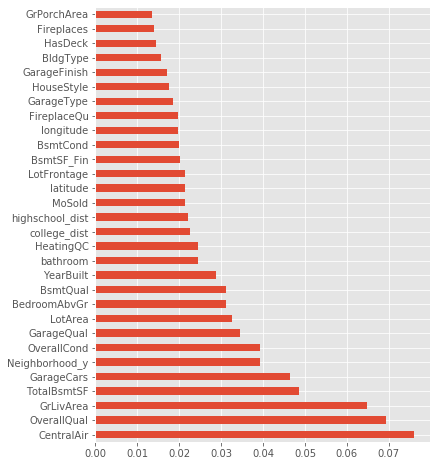

In [187]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(6,8))
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X2,y2,test_size=0.25)

In [95]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
lasso = Lasso()
ridge = Ridge()

In [96]:
ss.fit(Xtrain)
Xs_train = ss.transform(Xtrain)

In [97]:
params_lasso = [{'alpha':[1e-4, 1e-2, 0.1, 1, 2, 20]}]
params_ridge = [{'alpha':[1e-4, 1e-2, 0.1, 1, 2, 10]}]

In [101]:
from sklearn.model_selection import KFold

In [104]:
from sklearn.model_selection import GridSearchCV, KFold

kf5 = KFold(n_splits=5, shuffle=True)

grid_lasso = GridSearchCV(estimator=lasso, param_grid=params_lasso, cv=kf5)
grid_ridge = GridSearchCV(estimator=ridge, param_grid=params_ridge, cv=kf5)

grid_lasso.fit(Xs_train, ytrain)
grid_ridge.fit(Xs_train, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 0.1, 1, 2, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
grid_lasso.best_score_

0.37049407441235976

In [106]:
grid_ridge.best_score_

0.3533521711968728

# Tree Based Models

In [172]:
X1 = clean_df.drop(labels=['SalePrice', 'SalePriceLog'], axis=1)
y1 = clean_df['SalePrice']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1784, 45), (765, 45))

In [188]:
# #Random Forrest
# from sklearn import ensemble

# randomForest = ensemble.RandomForestClassifier()
# bagging      = ensemble.BaggingClassifier()

# randomForest.set_params(random_state=42, n_estimators=1000, max_features=2)

# print(randomForest.fit(X_train,y_train))

# print(randomForest.score(X_train,y_train))
# randomForest.score(X_test,y_test)



## Gradient Boost

In [177]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [186]:

gbm = GradientBoostingRegressor()

gbm.set_params(n_estimators = 1000, 
            learning_rate = .1, #.3,
            max_depth = 3, #2,
            min_samples_leaf = 3)

gbm.fit(X_train,y_train)

print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

--------------------------------------------------
The train set R^2 is 0.996
The test set R^2 is 0.914


In [182]:
param_grid={'n_estimators':[1000], 
            'learning_rate': [.3,.2,0.1],
            'max_depth':[1,2,3],
            'min_samples_leaf':[3]
           }

grid_search = GridSearchCV(estimator= gbm, param_grid= param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.3,
                                                 loss='ls', max_depth=2,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=3,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000,
                                                 n_it...o_change=None,
              

In [183]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 1000}
0.9316963797603851


In [184]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [185]:
sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)

[('OverallQual', 0.4285820309889656),
 ('GrLivArea', 0.18193639080063115),
 ('TotalBsmtSF', 0.11681525241967304),
 ('Neighborhood_y', 0.08473451670157243),
 ('bathroom', 0.06261055096683281),
 ('LotArea', 0.017996677600547305),
 ('FireplaceQu', 0.013578017161019716),
 ('ExterQual', 0.013049811921152153),
 ('BsmtQual', 0.012693342512405038),
 ('OverallCond', 0.010845704726643994),
 ('YearBuilt', 0.01068410789654252),
 ('BsmtFullBath2', 0.006210491335981938),
 ('latitude', 0.004789771227099073),
 ('GrPorchArea', 0.0043883828983619965),
 ('college_dist', 0.003719208360513913),
 ('CentralAir', 0.0034628068555983),
 ('longitude', 0.0033987077494866394),
 ('HeatingQC', 0.0030510526291939685),
 ('highschool_dist', 0.0028182445669943526),
 ('BsmtSF_Fin', 0.0027692966938152918),
 ('LotFrontage', 0.0019033890301574138),
 ('Fireplaces', 0.0017273471383854894),
 ('BedroomAbvGr', 0.0015802873287120449),
 ('Condition1', 0.0014424090691426738),
 ('BldgType', 0.0012312131009242226),
 ('MoSold', 0.0010